In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
m,n,o = x_train.shape
p,q,r = x_test.shape

print(m,n,o)
print(p,q,r)

60000 28 28
10000 28 28


In [ ]:
x_train = x_train.reshape(m ,784).T
x_train = x_train / 255.
x_test = x_test.reshape(p ,784).T
x_test = x_test / 255.


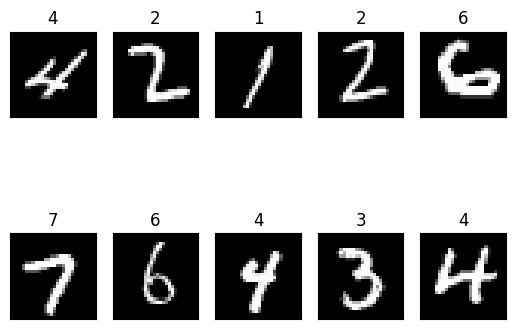

In [ ]:
for index in range(10):
    # new subplot with (i + 1)-th index laying on a grid
    plt.subplot(2, 5, index + 1)

    # drawing the plot
    for i in np.random.randint(m, size=10):
      plt.imshow(x_train[:,i].reshape(28,28), cmap='gray')
      plt.title(y_train[i])
      plt.xticks([]) # disabling xticks by Setting xticks to an empty list
      plt.yticks([]) # disabling yticks by setting yticks to an empty list


plt.show()

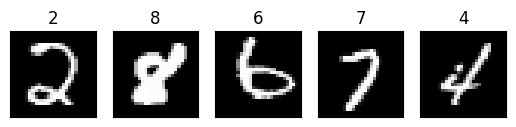

In [ ]:
for index in range(5):
    # new subplot with (i + 1)-th index laying on a grid
    plt.subplot(1, 5, index + 1)

    # drawing the plot
    for i in np.random.randint(p, size=10):
      plt.imshow(x_test[:,i].reshape(28,28), cmap='gray')
      plt.title(y_test[i])
      plt.xticks([]) # disabling xticks by Setting xticks to an empty list
      plt.yticks([]) # disabling yticks by setting yticks to an empty list


plt.show()

In [ ]:
# initialize w1, b1, w2, b2

def init_param(x1 = 10, y1 = 784, x2 = 10, y2 = 10):
  W1 = np.random.rand(x1, y1) - 0.5
  b1 = np.random.rand(x1, 1) - 0.5
  W2 = np.random.rand(x2, y2) - 0.5
  b2 = np.random.rand(x2, 1) - 0.5

  return W1, b1, W2, b2

def relu(Z):
  return np.maximum(0, Z)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def derive_relu(Z):
  return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = relu(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)

  return Z1, A1, Z2, A2

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2 )

  dZ1 = W2.T.dot(dZ2) * derive_relu(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ2)

  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2

  return W1, b1, W2, b2

In [ ]:
def get_pred(A2):
  return np.argmax(A2,0)

def get_accuracy(pred, Y):
  print(pred, Y)
  return np.sum(pred == Y ) / Y.size


def gradient_decent(X, Y, alpha, iteration):

  W1, b1, W2, b2 = init_param()
  for i in range(iteration):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if (i% 10 == 0):
      print('Iteration: ', i)
      print('Accuracy: ', get_accuracy(get_pred(A2), Y))

  return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_decent(x_train, y_train, 0.10, 200)

Iteration:  0
[1 1 1 ... 1 1 8] [5 0 4 ... 5 6 8]
Accuracy:  0.11975
Iteration:  10
[9 6 4 ... 2 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.2608
Iteration:  20
[9 6 4 ... 3 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.32595
Iteration:  30
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.39015
Iteration:  40
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.4538
Iteration:  50
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.5162666666666667
Iteration:  60
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.5497333333333333
Iteration:  70
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.57855
Iteration:  80
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.6056166666666667
Iteration:  90
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.6290833333333333
Iteration:  100
[3 0 4 ... 3 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.6496833333333333
Iteration:  110
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.6671166666666667
Iteration:  120
[3 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuracy:  0.6844
Iteration:  130
[3 0 4 ..

In [ ]:
print(W1, b1, W2, b2)

[[-0.32759186 -0.0823817  -0.20338416 ...  0.48999748 -0.20900974
  -0.48153359]
 [ 0.35784278  0.49083859 -0.41993997 ... -0.1131771  -0.28221778
  -0.39964735]
 [ 0.48567587 -0.47654501 -0.01379603 ...  0.32707716 -0.17752081
  -0.15721114]
 ...
 [-0.32729108  0.43225324 -0.48802636 ...  0.10952781  0.17178839
  -0.19920842]
 [ 0.32946463  0.1078261   0.29353452 ... -0.21048812 -0.28848467
  -0.0913775 ]
 [ 0.35737946 -0.08994526 -0.28792324 ... -0.24378042  0.09152116
  -0.32462392]] [[-0.18286675]
 [-0.44190406]
 [ 0.15042062]
 [ 0.18816493]
 [-0.35079364]
 [-0.29710538]
 [ 0.2480128 ]
 [-0.04977966]
 [-0.2078776 ]
 [-0.24397941]] [[ 0.20053281  0.57503357  0.19523669 -0.21533755  0.1373518   0.76366999
  -0.13270655 -0.55090379 -0.8376611  -0.87630807]
 [-0.3151602  -0.53524118  0.07412549  0.24011052  0.20684759 -0.86599191
   0.30089325 -0.77496356 -0.48558104  1.33062742]
 [-0.52495585 -0.44021999  0.84512744  0.19408061 -0.22364019  0.45974879
   0.45958849  0.04591445 -0.5981

In [ ]:
 Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, x_test)

In [ ]:
A2.shape

(10, 10000)

In [ ]:
y_pred = get_pred(A2)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
get_accuracy(y_pred, y_test)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


0.8193

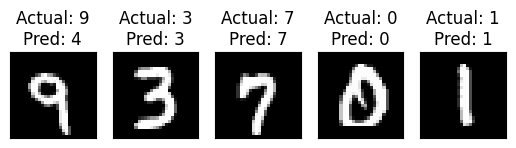

In [ ]:
for index in range(5):
    # new subplot with (i + 1)-th index laying on a grid
    plt.subplot(1, 5, index + 1)

    # drawing the plot
    for i in np.random.randint(p, size=10):
      plt.imshow(x_test[:,i].reshape(28,28), cmap='gray')
      plt.title( 'Actual: '+str(y_test[i])+'\nPred: '+str(y_pred[i]) )
      plt.xticks([]) # disabling xticks by Setting xticks to an empty list
      plt.yticks([]) # disabling yticks by setting yticks to an empty list


plt.show()